In [1]:
#Importing Packages

import numpy as np # working with arrays
import pandas as pd #data processing
import sklearn # modeling and data preprocessing
import matplotlib.pyplot as plt # visualiztion
import seaborn as sn

In [11]:
data=pd.read_csv('data.csv')
data.head()


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
data.shape

(11500, 180)

In [4]:
Samples=len(data.y)
Target=data.y
Target[Target>1]=0
Seizure=Target.value_counts() 
Seizure_percentage=(Seizure[1]/len(Target))*100

print('Total samples are:',Samples)
print('The number of trial for the non seizure class is:',Seizure[0])
print('The number of trial for the seizure class is:',Seizure[1])
print('The percantage of the seizure class is:{}%'.format(Seizure_percentage))


Total samples are: 11500
The number of trial for the non seizure class is: 9200
The number of trial for the seizure class is: 2300
The percantage of the seizure class is:20.0%


C:\Users\Shihab\AppData\Local\Temp/ipykernel_1388/549305994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target[Target>1]=0


In [5]:
Seizure

0    9200
1    2300
Name: y, dtype: int64

In [6]:
print('Details of output variable:')
data.y.describe()

Details of output variable:


count    11500.000000
mean         0.200000
std          0.400017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [7]:
x = data.iloc[:, 1:-1].values
y=data.iloc[:,-1].values
print('The shape of feature variable:',x.shape)
print('The shape of output variable:',y.shape)

The shape of feature variable: (11500, 178)
The shape of output variable: (11500,)


Total samples are: 11500
The number of trial for the non seizure class is: 9200
The number of trial for the seizure class is: 2300


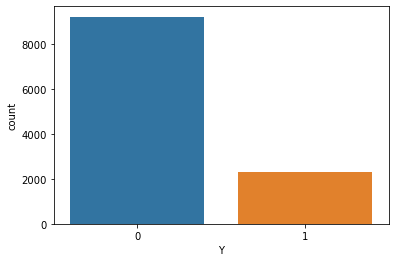

In [8]:
sn.countplot(x=y,data=data)
plt.xlabel('Y')
print('Total samples are:',Samples)
print('The number of trial for the non seizure class is:',Seizure[0])
print('The number of trial for the seizure class is:',Seizure[1])

# Train test split of the dataset

In [40]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=15)
print('X Train Sample:', x_train[:1])
print('X Test Sample:', x_test_smote[:1])
print('Y Train Sample:', y_train_smote[:20])
print('Y Test Sample:', y_test_smote[:20])

X Train Sample: [[ -46  -47  -31   -6  -13  -41  -76  -95  -90  -83  -80  -75  -77  -52
   -54  -48  -48  -39  -54  -55  -72  -39  -42  -28  -25  -33  -31  -41
   -44  -52  -31  -22  -14    2   14   44   42   46   49   59   59   56
    42   41   29   -1  -40  -68  -72  -39  -23   17   33   36   10   -6
   -30  -37  -39  -43  -74 -107 -136 -160 -134  -93  -54  -76 -111 -118
  -116  -95  -97 -104 -101  -75  -27   -1   25   38   20   -1   -5   40
    81   85   58   40   33   79   92  125  117  105   75   64   61   65
    52   61   69   69   67  125  144  157  131   91   90   82   99   82
    81   69   25  -18  -46  -13   39  107  151  158  134   36    6   -5
    39   84   70    3  -64  -74  -48  -28   -3   24   60   93   91   52
   -34  -94 -153 -181 -165 -121  -49   15   43   31  -10  -45  -59  -63
   -54  -59  -31   -6   40   64   88  102  136  117   76    4  -48  -82
   -93  -97 -105  -92  -61  -11   54   64   69   57]]
X Test Sample: [[-110 -189 -285 -332 -311 -262 -197 -155 -135  -28

In [ ]:
print('X Train Sample:', y_train)

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
a=y_sm[y_sm==0]
a.shape
b=y_sm[y_sm==1]
print('The number of trial for the non seizure class is:',b.shape)
print('The number of trial for the seizure class is:',a.shape)


The number of trial for the non seizure class is: (9200,)
The number of trial for the seizure class is: (9200,)


In [13]:
from sklearn.model_selection import train_test_split
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_sm,y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [39]:
from sklearn.model_selection import train_test_split
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)
print('X Train Sample:', x_train_smote[:1])
print('X Test Sample:', x_test_smote[:1])
print('Y Train Sample:', y_train_smote[:20])
print('Y Test Sample:', y_test_smote[:20])
x_train_smote.shape
y_train_smote.shape

X Train Sample: [[ -31  -18   -6   13   39   92  124  121   62  -38 -115 -165 -183 -190
  -188 -170 -132  -87  -41   -1   35   59   69   53   26   -6  -27  -40
   -42  -36  -30  -35  -32  -31  -15   -8    5   13   32   45   94  244
   450  695  710  329 -146 -501 -522 -326 -175  -74  -41  -57 -131 -289
  -472 -573 -529 -300  -13  223  357  405  415  414  394  332  235  113
    10  -78 -113 -126 -117 -117 -109  -90  -61  -34  -36  -41  -66  -83
   -96  -88  -66  -29    0   18   37   43   60   65   77   66   49   22
     0   -1   -3  -12  -25  -34  -47  -45  -44  -36  -28   -3   29   71
   102  128  126  101   56    1  -19   90  292  555  562  175 -291 -590
  -546 -299 -128  -35  -24 -148 -337 -501 -490 -353 -158  -12   42   69
    87   84   72   57   50   56  108  137  154  154  114 -107 -414 -739
  -901 -807 -507 -128  253  443  483  269 -148 -548 -757 -609 -263   28
   167  231  212  178  130  106  104  105  125  131]]
X Test Sample: [[-110 -189 -285 -332 -311 -262 -197 -155 -135  -28

(14720,)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_stn=sc.fit_transform(x_train_smote)
x_test_stn=sc.transform(x_test_smote)
print('x_train Standardisation:',x_train_stn[:1])
print('x_test Standardisation:',x_test_stn[:1])
x_train.shape

x_train Standardisation: [[-0.0679149  -0.00799507  0.04480927  0.12831368  0.24366971  0.48915373
   0.63864084  0.62109375  0.32707895 -0.17271931 -0.56059238 -0.80421656
  -0.86361266 -0.86825581 -0.84575081 -0.76915276 -0.6056711  -0.39681827
  -0.176133    0.01704017  0.19047836  0.30634454  0.3566669   0.28201423
   0.14733712 -0.01680896 -0.11931416 -0.17766437 -0.18084228 -0.14901307
  -0.11684703 -0.1437462  -0.1350985  -0.13815398 -0.06247336 -0.02020267
   0.05439117  0.10112298  0.19539336  0.25396333  0.48381503  1.22313008
   2.25144628  3.43086418  3.44324961  1.57366308 -0.6622462  -2.32257806
  -2.46770622 -1.55343265 -0.82248026 -0.31627098 -0.15362658 -0.23562235
  -0.59665662 -1.39372362 -2.3549875  -2.86581805 -2.55298288 -1.36101337
   0.01386677  1.13769804  1.82874092  2.0748852   2.0976297   2.04524252
   1.93971309  1.64800179  1.17290904  0.56908715  0.06617948 -0.36203582
  -0.53260885 -0.59602861 -0.54342687 -0.5310493  -0.48831547 -0.40185294
  -0.26396746

(8050, 178)

In [16]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [2,10,20,30,60,100],
    'min_samples_leaf' : [5,15,25,5,70],
    'min_samples_split': [30,2,15,60],
    'splitter' : ['best', 'random']
}

In [17]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree=DecisionTreeClassifier()

In [19]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy', max_depth =100, min_samples_leaf= 5, 
                                      min_samples_split= 2, splitter ='best')
DecisionTree.fit(x_train_stn,y_train_smote)
tree_pred=DecisionTree.predict(x_test_stn)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1840
           1       0.92      0.93      0.93      1840

    accuracy                           0.93      3680
   macro avg       0.93      0.93      0.93      3680
weighted avg       0.93      0.93      0.93      3680



In [20]:
#K_Nearest_Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_smote,y_train_smote)
knn_pred=knn.predict(x_test_smote)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, knn_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1840
           1       1.00      0.98      0.99      1840

    accuracy                           0.99      3680
   macro avg       0.99      0.99      0.99      3680
weighted avg       0.99      0.99      0.99      3680



In [21]:
#logistic regression
from sklearn.linear_model  import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train_stn,y_train_smote)
log_reg_pred=log_reg.predict(x_test_stn)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, log_reg_pred))


              precision    recall  f1-score   support

           0       0.61      0.77      0.68      1840
           1       0.69      0.52      0.59      1840

    accuracy                           0.64      3680
   macro avg       0.65      0.64      0.64      3680
weighted avg       0.65      0.64      0.64      3680



D:\jupyter anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train_smote,y_train_smote)
svm_pred=svm.predict(x_test_smote)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, svm_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1840
           1       0.98      0.97      0.97      1840

    accuracy                           0.97      3680
   macro avg       0.97      0.97      0.97      3680
weighted avg       0.97      0.97      0.97      3680



In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_smote,y_train_smote)
rfc_pred=rfc.predict(x_test_smote)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1840
           1       0.97      0.99      0.98      1840

    accuracy                           0.98      3680
   macro avg       0.98      0.98      0.98      3680
weighted avg       0.98      0.98      0.98      3680



In [24]:
from sklearn.naive_bayes import GaussianNB
GN = GaussianNB()
GN.fit(x_train, y_train)
GN_preds=GN.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, GN_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2787
           1       0.90      0.88      0.89       663

    accuracy                           0.96      3450
   macro avg       0.94      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



In [25]:
from sklearn.neural_network import MLPClassifier
nns=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
nns.fit(x_train,y_train)
nns_pred=nns.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, nns_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2787
           1       0.92      0.76      0.84       663

    accuracy                           0.94      3450
   macro avg       0.93      0.87      0.90      3450
weighted avg       0.94      0.94      0.94      3450



In [28]:
from sklearn.linear_model import RidgeClassifier
RC=RidgeClassifier()
RC.fit(x_train_stn,y_train_smote)
RC_pred=RC.predict(x_test_stn)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, RC_pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68      1840
           1       0.69      0.52      0.59      1840

    accuracy                           0.64      3680
   macro avg       0.65      0.64      0.64      3680
weighted avg       0.65      0.64      0.64      3680



In [29]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier(n_estimators=200)
ABC.fit(x_train_stn,y_train_smote)
ABC_pred=ABC.predict(x_test_stn)
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, ABC_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1840
           1       0.94      0.90      0.92      1840

    accuracy                           0.92      3680
   macro avg       0.92      0.92      0.92      3680
weighted avg       0.92      0.92      0.92      3680



In [30]:
from sklearn.metrics import recall_score
rfc_recall=recall_score(y_test_smote,rfc_pred)
print("The Recall Score of Random Forest Classifier:{}".format(rfc_recall))
tree_recall=recall_score(y_test_smote,tree_pred)
print("The Recall Score of Decision Tree Classifier:{}".format(tree_recall))
knn_recall=recall_score(y_test_smote,knn_pred)
print("The Recall Score of K-Nearest Neighbors Classifier:{}".format(knn_recall))
log_reg_recall=recall_score(y_test_smote,log_reg_pred)
print("The Recall Score of Logistic Regression Classifier:{}".format(log_reg_recall))
svm_recall=recall_score(y_test_smote,svm_pred)
print("The Recall Score of Support Vector Machine  Classifier:{}".format(svm_recall))
GN_recall=recall_score(y_test,GN_preds)
print("The Recall Score of Naive Bayes Classifier:{}".format(GN_recall))
MLP_recall=recall_score(y_test,nns_pred)
print("The Recall Score of MLPClassifier:{}".format(MLP_recall))
RC_recall=recall_score(y_test_smote,RC_pred)
print("The Recall Score of Ridge Classifier:{}".format(RC_recall))
ABC_recall=recall_score(y_test_smote,ABC_pred)
print("The Recall Score of AdaBoost Classifier:{}".format(ABC_recall))

The Recall Score of Random Forest Classifier:0.9880434782608696
The Recall Score of Decision Tree Classifier:0.9293478260869565
The Recall Score of K-Nearest Neighbors Classifier:0.9820652173913044
The Recall Score of Logistic Regression Classifier:0.5163043478260869
The Recall Score of Support Vector Machine  Classifier:0.9668478260869565
The Recall Score of Naive Bayes Classifier:0.8838612368024132
The Recall Score of MLPClassifier:0.7647058823529411
The Recall Score of Ridge Classifier:0.5168478260869566
The Recall Score of AdaBoost Classifier:0.9027173913043478


In [31]:
from sklearn.metrics import precision_score
rfc_recall=precision_score(y_test_smote,rfc_pred)
print("The Precision Score of Random Forest Classifier:{}".format(rfc_recall))
tree_recall=precision_score(y_test_smote,tree_pred)
print("The Precision Score of Decision Tree Classifier:{}".format(tree_recall))
knn_recall=precision_score(y_test_smote,knn_pred)
print("The Precision Score of K-Nearest Neighbors Classifier:{}".format(knn_recall))
log_reg_recall=precision_score(y_test_smote,log_reg_pred)
print("The Precision Score of Logistic Regression Classifier:{}".format(log_reg_recall))
svm_recall=precision_score(y_test_smote,svm_pred)
print("The Precision Score of Support Vector Machine  Classifier:{}".format(svm_recall))
GN_recall=precision_score(y_test,GN_preds)
print("The Precision Score of Naive Bayes Classifier:{}".format(GN_recall))
MLP_recall=precision_score(y_test,nns_pred)
print("The Precision Score of MLPClassifier:{}".format(MLP_recall))
RC_recall=precision_score(y_test_smote,RC_pred)
print("The Precision Score of Ridge Classifier:{}".format(RC_recall))
ABC_recall=precision_score(y_test_smote,ABC_pred)
print("The Precision Score of AdaBoost Classifier:{}".format(ABC_recall))

The Precision Score of Random Forest Classifier:0.9685668620138519
The Precision Score of Decision Tree Classifier:0.9233261339092873
The Precision Score of K-Nearest Neighbors Classifier:0.996141124586549
The Precision Score of Logistic Regression Classifier:0.6909090909090909
The Precision Score of Support Vector Machine  Classifier:0.9769357495881383
The Precision Score of Naive Bayes Classifier:0.904320987654321
The Precision Score of MLPClassifier:0.9234972677595629
The Precision Score of Ridge Classifier:0.6936542669584245
The Precision Score of AdaBoost Classifier:0.9357746478873239


In [32]:
from sklearn.metrics import accuracy_score
rfc_recall=accuracy_score(y_test_smote,rfc_pred)
print("The Accuracy Score of Random Forest Classifier:{}".format(rfc_recall))
tree_recall=accuracy_score(y_test_smote,tree_pred)
print("The Accuracy Score of Decision Tree Classifier:{}".format(tree_recall))
knn_recall=accuracy_score(y_test_smote,knn_pred)
print("The Accuracy Score of K-Nearest Neighbors Classifier:{}".format(knn_recall))
log_reg_recall=accuracy_score(y_test_smote,log_reg_pred)
print("The Accuracy Score of Logistic Regression Classifier:{}".format(log_reg_recall))
svm_recall=accuracy_score(y_test_smote,svm_pred)
print("The Accuracy Score of Support Vector Machine  Classifier:{}".format(svm_recall))
GN_recall=accuracy_score(y_test,GN_preds)
print("The Accuracy Score of Naive Bayes Classifier:{}".format(GN_recall))
MLP_recall=accuracy_score(y_test,nns_pred)
print("The Accuracy Score of MLPClassifier:{}".format(MLP_recall))
RC_recall=accuracy_score(y_test_smote,RC_pred)
print("The Accuracy Score of Ridge Classifier:{}".format(RC_recall))
ABC_recall=accuracy_score(y_test_smote,ABC_pred)
print("The Accuracy Score of AdaBoost Classifier:{}".format(ABC_recall))

The Accuracy Score of Random Forest Classifier:0.9779891304347826
The Accuracy Score of Decision Tree Classifier:0.9260869565217391
The Accuracy Score of K-Nearest Neighbors Classifier:0.9891304347826086
The Accuracy Score of Logistic Regression Classifier:0.6426630434782609
The Accuracy Score of Support Vector Machine  Classifier:0.9720108695652174
The Accuracy Score of Naive Bayes Classifier:0.9597101449275363
The Accuracy Score of MLPClassifier:0.9426086956521739
The Accuracy Score of Ridge Classifier:0.6442934782608696
The Accuracy Score of AdaBoost Classifier:0.9203804347826087


In [38]:
from sklearn.metrics import f1_score
rfc_recall=f1_score(y_test_smote,rfc_pred)
print("The F1 score of Random Forest Classifier:{}".format(rfc_recall))
tree_recall=f1_score(y_test_smote,tree_pred)
print("The F1 score of Decision Tree Classifier:{}".format(tree_recall))
knn_recall=f1_score(y_test_smote,knn_pred)
print("The F1 score of K-Nearest Neighbors Classifier:{}".format(knn_recall))
log_reg_recall=f1_score(y_test_smote,log_reg_pred)
print("The F1 score of Logistic Regression Classifier:{}".format(log_reg_recall))
svm_recall=f1_score(y_test_smote,svm_pred)
print("The F1 score of Support Vector Machine  Classifier:{}".format(svm_recall))
GN_recall=f1_score(y_test,GN_preds)
print("The F1 score of Naive Bayes Classifier:{}".format(GN_recall))
MLP_recall=f1_score(y_test,nns_pred)
print("The F1 score of MLPClassifier:{}".format(MLP_recall))
RC_recall=f1_score(y_test_smote,RC_pred)
print("The F1 score of Ridge Classifier:{}".format(RC_recall))
ABC_recall=f1_score(y_test_smote,ABC_pred)
print("The F1 score of AdaBoost Classifier:{}".format(ABC_recall))

The F1 score of Random Forest Classifier:0.9782082324455206
The F1 score of Decision Tree Classifier:0.9263271939328278
The F1 score of K-Nearest Neighbors Classifier:0.9890530925013684
The F1 score of Logistic Regression Classifier:0.5909797822706065
The F1 score of Support Vector Machine  Classifier:0.9718656104889374
The F1 score of Naive Bayes Classifier:0.8939740655987796
The F1 score of MLPClassifier:0.8366336633663366
The F1 score of Ridge Classifier:0.5923388352538149
The F1 score of AdaBoost Classifier:0.9189488243430152


In [37]:
from sklearn.metrics import matthews_corrcoef
rfc_recall=matthews_corrcoef(y_test_smote,rfc_pred)
print("The Matthews Correlation Coefficient of Random Forest Classifier:{}".format(rfc_recall))
tree_recall=matthews_corrcoef(y_test_smote,tree_pred)
print("The Matthews Correlation Coefficient of Decision Tree Classifier:{}".format(tree_recall))
knn_recall=matthews_corrcoef(y_test_smote,knn_pred)
print("The Matthews Correlation Coefficient of K-Nearest Neighbors Classifier:{}".format(knn_recall))
log_reg_recall=matthews_corrcoef(y_test_smote,log_reg_pred)
print("The Matthews Correlation Coefficient of Logistic Regression Classifier:{}".format(log_reg_recall))
svm_recall=matthews_corrcoef(y_test_smote,svm_pred)
print("The Matthews Correlation Coefficient of Support Vector Machine  Classifier:{}".format(svm_recall))
GN_recall=matthews_corrcoef(y_test,GN_preds)
print("The Matthews Correlation Coefficient of Naive Bayes Classifier:{}".format(GN_recall))
MLP_recall=matthews_corrcoef(y_test,nns_pred)
print("The Matthews Correlation Coefficient of MLPClassifier:{}".format(MLP_recall))
RC_recall=matthews_corrcoef(y_test_smote,RC_pred)
print("The Matthews Correlation Coefficient of Ridge Classifier:{}".format(RC_recall))
ABC_recall=matthews_corrcoef(y_test_smote,ABC_pred)
print("The Matthews Correlation Coefficient of AdaBoost Classifier:{}".format(ABC_recall))

The Matthews Correlation Coefficient of Random Forest Classifier:0.9561715990182538
The Matthews Correlation Coefficient of Decision Tree Classifier:0.8521920364127689
The Matthews Correlation Coefficient of K-Nearest Neighbors Classifier:0.9783585484693825
The Matthews Correlation Coefficient of Logistic Regression Classifier:0.2948984497108882
The Matthews Correlation Coefficient of Support Vector Machine  Classifier:0.9440720727646107
The Matthews Correlation Coefficient of Naive Bayes Classifier:0.869194518044006
The Matthews Correlation Coefficient of MLPClassifier:0.807449922377478
The Matthews Correlation Coefficient of Ridge Classifier:0.29844467007411285
The Matthews Correlation Coefficient of AdaBoost Classifier:0.8412859674545244


In [33]:
from sklearn.metrics import confusion_matrix
def conf_matrix(cm,labels=['Normal','Epilepsy Affected']):
    data=pd.DataFrame(data=cm,index=labels,columns=labels)
    data.index.name='TRUE'
    data.columns.name='PREDICITION'
    data.loc['Total']=data.sum()
    data['total']=data.sum(axis=1)
    return data



In [34]:
ABC_cm=confusion_matrix(y_test_smote,ABC_pred)
conf_matrix(ABC_cm)

PREDICITION,Normal,Epilepsy Affected,total
TRUE,,,
Normal,1726,114,1840
Epilepsy Affected,179,1661,1840
Total,1905,1775,3680


<function matplotlib.pyplot.show(close=None, block=None)>

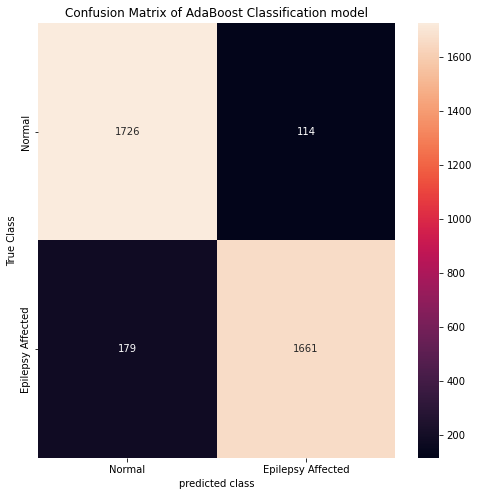

In [35]:
import seaborn as sns
LABELS=['Normal','Epilepsy Affected']
plt.figure(figsize=(8,8))
sns.heatmap(ABC_cm,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt="d")
plt.title('Confusion Matrix of AdaBoost Classification model')
plt.ylabel('True Class')
plt.xlabel('predicted class')
plt.show